In [4]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sys import platform

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    path = '~/Documents/GitHub/f1-analytics/'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv(path+'data/driver_standings.csv')
merged = pd.read_csv(path+'data/merged.csv')

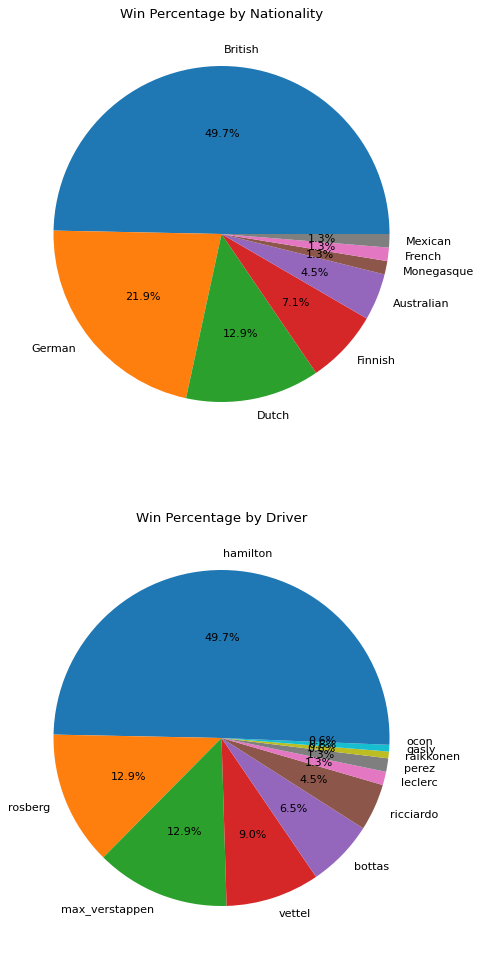

In [6]:
winners = merged.query('podium == 1')

nationalities = winners.nationality.value_counts()
drivers = winners.driver.value_counts()

fig, (ax1, ax2) = plt.subplots(2, dpi=80)
fig.set_size_inches(10, 15)

ax1.set_title('Win Percentage by Nationality')
ax1.pie(nationalities.values, labels=nationalities.index,autopct='%1.1f%%')

ax2.set_title('Win Percentage by Driver')
ax2.pie(drivers.values, labels=drivers.index,autopct='%1.1f%%')
plt.show()

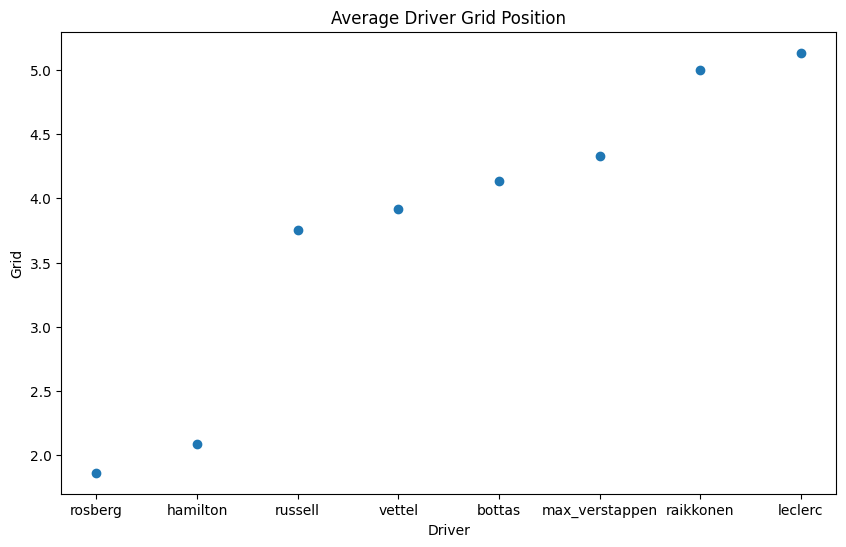

In [7]:
avg_driver_grid = merged.groupby(
    'driver'
    ).agg({
    'grid': mean
    }
).reset_index().sort_values('grid')

driver_values = avg_driver_grid[:8]

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10,6)

axs.set_title('Average Driver Grid Position')
axs.set_xlabel('Driver')
axs.set_ylabel('Grid')
axs.scatter(driver_values.driver, driver_values.grid)
plt.show()

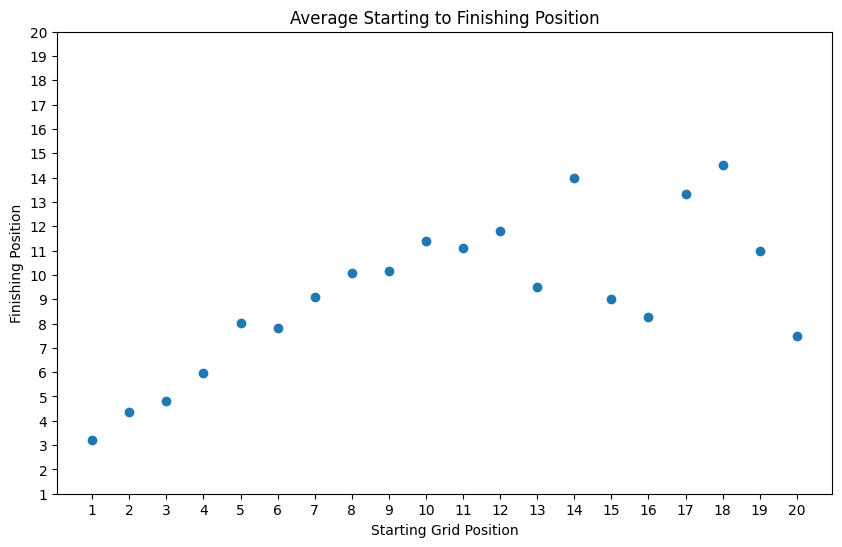

In [10]:
group_by_grid = merged.groupby(
    'grid'
    ).agg({
        'podium': mean
    }
).reset_index().sort_values('grid')

fig, axs = plt.subplots(1, dpi=100)
fig.set_size_inches(10,6)

axs.set_title('Average Starting to Finishing Position')
axs.set_xlabel('Starting Grid Position')
axs.set_xticks(list(range(1,21)))
axs.set_yticks(list(range(1,21)))
axs.set_ylim([1,20])
axs.set_ylabel('Finishing Position')
axs.scatter(group_by_grid.grid, group_by_grid.podium)
plt.show()